In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

# Exploracion Inicial y Limpieza de Datos 

In [56]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [57]:
# Cambiamos las columnas de fecha registro y fecha venta a tipo datetime.
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [58]:
# Dividimos la columna de fecha venta en tres nuevas columnas, según el día, mes y año. 
for col in ['fecha_venta']:
    df_bmw[col + '_MES'] = df_bmw[col].dt.month
    df_bmw[col + '_AÑO'] = df_bmw[col].dt.year
        

df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_venta_MES,fecha_venta_AÑO
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,1.0,2018.0
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,2.0,2018.0
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2.0,2018.0
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,2.0,2018.0
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.0,2018.0


In [59]:
# Eliminamos las columnas de marca,modelo y fecha venta.
df_bmw.drop('fecha_venta',axis=1,inplace=True)
df_bmw.drop('modelo',axis=1,inplace=True)
df_bmw.drop('marca',axis=1,inplace=True)

df_bmw.head()

,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
0,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,1.0,2018.0
1,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2.0,2018.0
2,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2.0,2018.0
3,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2.0,2018.0
4,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,4.0,2018.0


In [60]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio','fecha_venta_MES','fecha_venta_AÑO']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

df2_bmw.isnull().sum()

km                                0
potencia                          0
fecha_registro                 2411
tipo_gasolina                     0
color                           442
tipo_coche                     1451
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3376
elevalunas_electrico              0
bluetooth                       726
gps                               0
alerta_lim_velocidad            726
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [61]:
df3_bmw = df2_bmw.copy()

<Axes: >

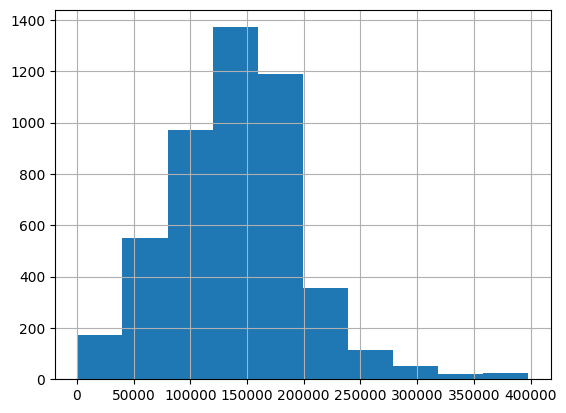

In [62]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)

df3_bmw['km'].hist()

In [63]:
df4_bmw = df3_bmw.copy()

<Axes: >

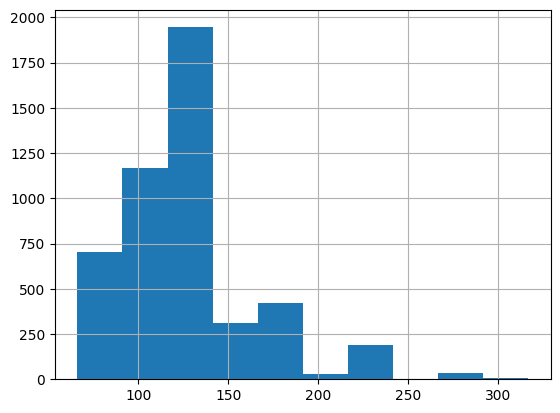

In [64]:
# Quitamos los outliers de la columna 'potencia'. 
df4_bmw.drop(df4_bmw[((df4_bmw["potencia"]<=50) | (df4_bmw["potencia"]>=400))].index, inplace=True)

df4_bmw['potencia'].hist()

<Axes: >

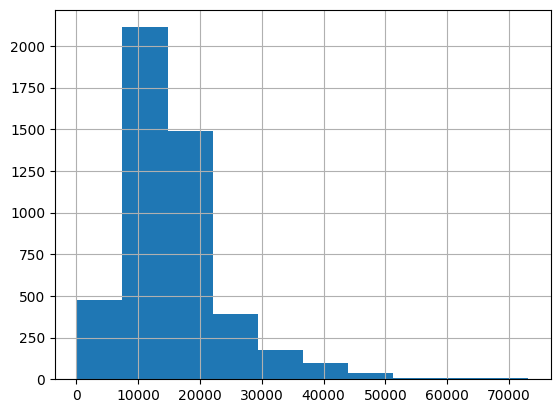

In [65]:
# Quitamos los outliers de la columna 'precio'. 
df4_bmw.drop(df4_bmw[((df4_bmw["precio"]<=100) | (df4_bmw["precio"]>=75000))].index, inplace=True)

df4_bmw['precio'].hist()

In [66]:
# Eliminamos la columna de fecha registro, ya que tenemos el 50 % de valores nulos. 
df4_bmw.drop('fecha_registro',axis=1,inplace=True)

df4_bmw.isnull().sum()

km                                0
potencia                          0
tipo_gasolina                     0
color                           441
tipo_coche                     1445
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3360
elevalunas_electrico              0
bluetooth                       722
gps                               0
alerta_lim_velocidad            722
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [67]:
# Cambiamos los valores nulos de las columnas de color y tipo coche, por 'sin especificar'.
df4_bmw["color"].fillna("sin especificar", inplace=True)
df4_bmw["tipo_coche"].fillna('sin especificar', inplace=True)

df4_bmw.isnull().sum()

km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3360
elevalunas_electrico              0
bluetooth                       722
gps                               0
alerta_lim_velocidad            722
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [68]:
df5_bmw = df4_bmw.copy()

In [69]:
# Guardamos el dataframe en un pickle para así poder seguir el día siguiente sin tener que ejecutar todo. 
pd.to_pickle(df5_bmw,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/practica_entregable_Simeon_Mitev_PK")

In [70]:
# Ejecutamos el pickle y creamos una nueva variable. 
df_bmw_rec=pd.read_pickle("practica_entregable_Simeon_Mitev_PK")

# 2ª parte con la Limpieza de Datos 

In [71]:
# Eliminamos la columna de asientos traseros plegables ya que tiene más valores nulos que valores con información. 
df_bmw_rec.drop('asientos_traseros_plegables',axis=1,inplace=True)

In [72]:
# Sustituyo los valores nulos de estas columnas por su mediana.
df_bmw_rec["aire_acondicionado"].fillna(df_bmw_rec["aire_acondicionado"].median(),inplace=True)
df_bmw_rec["bluetooth"].fillna(df_bmw_rec["bluetooth"].median(),inplace=True)
df_bmw_rec["alerta_lim_velocidad"].fillna(df_bmw_rec["alerta_lim_velocidad"].median(),inplace=True)


In [73]:
columnas_a_convertir = ['volante_regulable', 'aire_acondicionado', 'camara_trasera','elevalunas_electrico','bluetooth','gps','alerta_lim_velocidad']

for col in columnas_a_convertir:
    df_bmw_rec[col] = df_bmw_rec[col].astype('int64')
    
df_bmw_rec.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,1.0,2018.0
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2.0,2018.0
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,2.0,2018.0
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,2.0,2018.0
4,97097.0,160.0,diesel,silver,sin especificar,1,1,0,0,1,1,1,33400.0,4.0,2018.0


In [74]:
# Eliminamos los valores más pequeños para la columna tipo gasolina.
valores_a_eliminar = ['Diesel', 'hybrid_petrol', 'electro']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['tipo_gasolina'].isin(valores_a_eliminar)]
df_bmw_rec['tipo_gasolina'].replace(valores_a_eliminar, inplace=True)

print(df_bmw_rec["tipo_gasolina"].value_counts())

tipo_gasolina
diesel    4598
petrol     189
Name: count, dtype: int64


C:\Users\mitev\AppData\Local\Temp\ipykernel_1632\4190776265.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['tipo_gasolina'].replace(valores_a_eliminar, inplace=True)


In [75]:
# Eliminamos los valores más pequeños para la columna colores.
valores_a_eliminar_colores = ['orange', 'green', 'beige','red']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['color'].isin(valores_a_eliminar_colores)]
df_bmw_rec['color'].replace(valores_a_eliminar_colores, inplace=True)

print(df_bmw_rec["color"].value_counts())

color
black              1481
grey               1057
blue                637
white               478
sin especificar     441
brown               301
silver              289
Name: count, dtype: int64


C:\Users\mitev\AppData\Local\Temp\ipykernel_1632\3988015735.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['color'].replace(valores_a_eliminar_colores, inplace=True)


In [76]:
# Eliminamos los valores más pequeños para la columna tipo_coche.
valores_a_eliminar_tipo_coche = ['van', 'convertible', 'coupe','subcompact']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['tipo_coche'].isin(valores_a_eliminar_tipo_coche)]
df_bmw_rec['tipo_coche'].replace(valores_a_eliminar_tipo_coche, inplace=True)

print(df_bmw_rec["tipo_coche"].value_counts())

tipo_coche
sin especificar    1407
estate             1074
sedan               800
suv                 730
hatchback           473
Name: count, dtype: int64


C:\Users\mitev\AppData\Local\Temp\ipykernel_1632\4094596672.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['tipo_coche'].replace(valores_a_eliminar_tipo_coche, inplace=True)


In [77]:
# Eliminamos outliers de la columna de fecha_venta_AÑO.
umbral = 2011.0
df_bmw_rec = df_bmw_rec[df_bmw_rec['fecha_venta_AÑO'] >= umbral]

df_bmw_rec['fecha_venta_AÑO'].value_counts()

fecha_venta_AÑO
2018.0    4481
Name: count, dtype: int64

In [78]:
df_bmw_rec.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,1.0,2018.0
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,2.0,2018.0
4,97097.0,160.0,diesel,silver,sin especificar,1,1,0,0,1,1,1,33400.0,4.0,2018.0
5,152352.0,225.0,petrol,black,sin especificar,1,1,0,1,1,1,1,17100.0,2.0,2018.0
11,228000.0,145.0,diesel,black,sin especificar,1,1,0,1,0,1,1,13300.0,3.0,2018.0


# Analisis Univariable y Correlación Inicial 

In [79]:
# PRIMERA VISUALIZACIÓN DE CORRELACIONES ENTRE COLUMNAS 
corr = df_bmw_rec.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

c:\Users\mitev\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\mitev\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
km,1.000000,-0.042489,0.067908,0.031964,0.001848,0.054863,-0.029470,0.168461,-0.032940,-0.425829,-0.006627,nan
potencia,-0.042489,1.000000,0.323249,0.180705,0.314551,0.337675,0.193261,0.011471,0.428430,0.678636,-0.041041,nan
volante_regulable,0.067908,0.323249,1.000000,0.285523,0.255652,0.267706,0.116946,0.248513,0.184905,0.287673,0.071595,nan
aire_acondicionado,0.031964,0.180705,0.285523,1.000000,0.141484,0.260457,0.104382,0.358099,0.160081,0.238751,0.007633,nan
camara_trasera,0.001848,0.314551,0.255652,0.141484,1.000000,0.199026,0.122091,0.063451,0.170411,0.265853,0.014862,nan
elevalunas_electrico,0.054863,0.337675,0.267706,0.260457,0.199026,1.000000,0.230448,0.201465,0.296489,0.277884,-0.027085,nan
bluetooth,-0.029470,0.193261,0.116946,0.104382,0.122091,0.230448,1.000000,0.114739,0.075996,0.195463,-0.011687,nan
gps,0.168461,0.011471,0.248513,0.358099,0.063451,0.201465,0.114739,1.000000,-0.054862,0.009580,0.062481,nan
alerta_lim_velocidad,-0.032940,0.428430,0.184905,0.160081,0.170411,0.296489,0.075996,-0.054862,1.000000,0.404630,-0.036143,nan
precio,-0.425829,0.678636,0.287673,0.238751,0.265853,0.277884,0.195463,0.009580,0.404630,1.000000,0.008112,nan


[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel    4335
petrol     146
Name: count, dtype: int64 

color 
 color
black              1424
grey               1010
blue                600
white               453
sin especificar     420
brown               298
silver              276
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
sin especificar    1406
estate             1072
sedan               800
suv                 730
hatchback           473
Name: count, dtype: int64 

[[<Axes: title={'center': 'volante_regulable'}>]]
[[<Axes: title={'center': 'aire_acondicionado'}>]]
[[<Axes: title={'center': 'camara_trasera'}>]]
[[<Axes: title={'center': 'elevalunas_electrico'}>]]
[[<Axes: title={'center': 'bluetooth'}>]]
[[<Axes: title={'center': 'gps'}>]]
[[<Axes: title={'center': 'alerta_lim_velocidad'}>]]
[[<Axes: title={'center': 'precio'}>]]


[[<Axes: title={'center': 'fecha_venta_MES'}>]]
[[<Axes: title={'center': 'fecha_venta_AÑO'}>]]


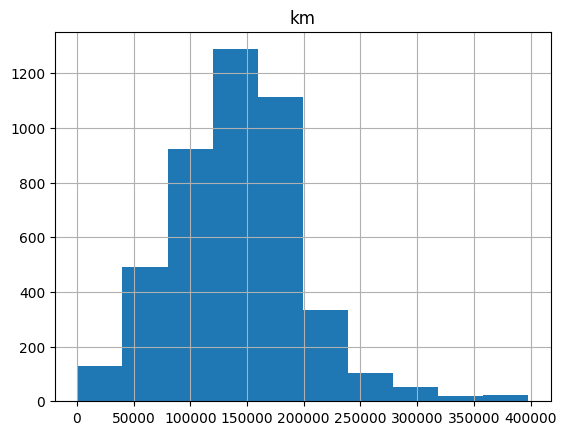

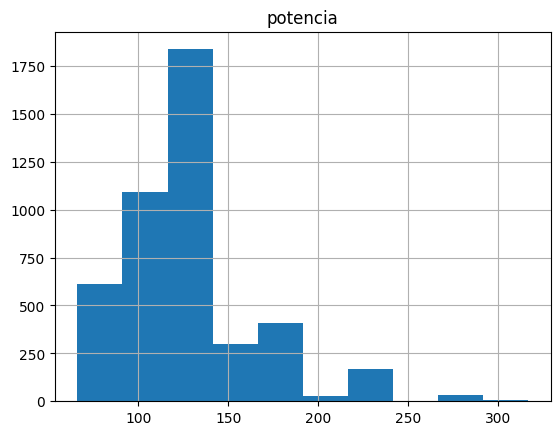

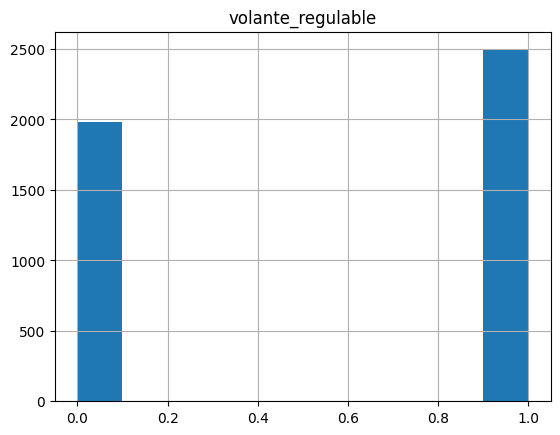

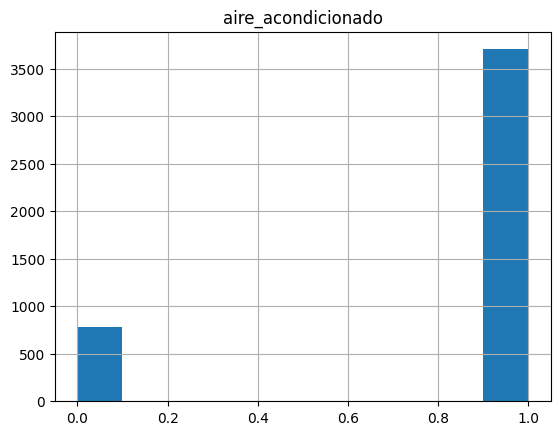

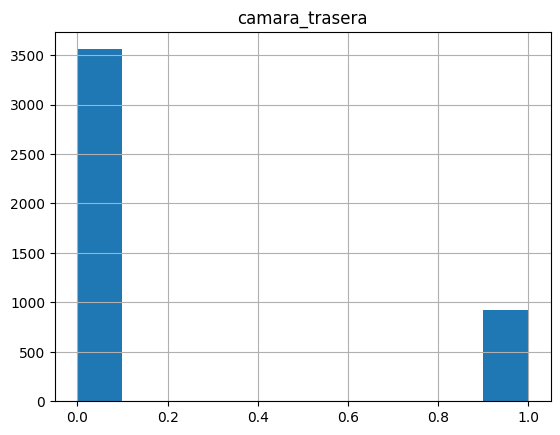

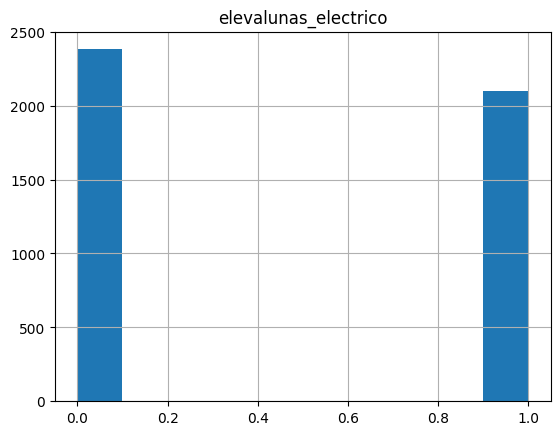

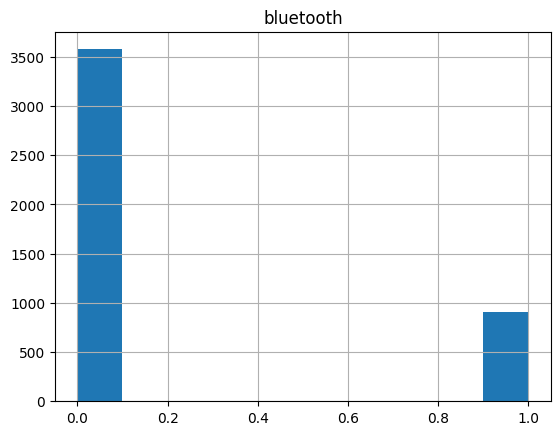

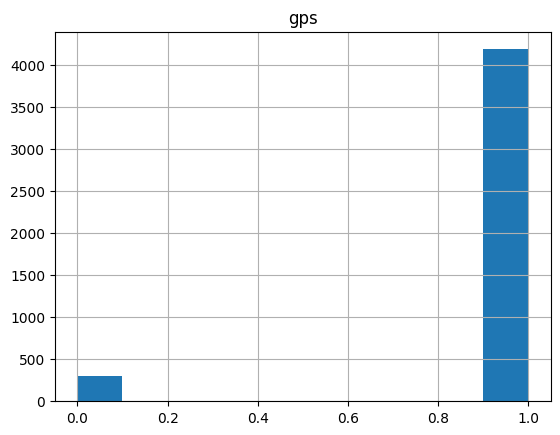

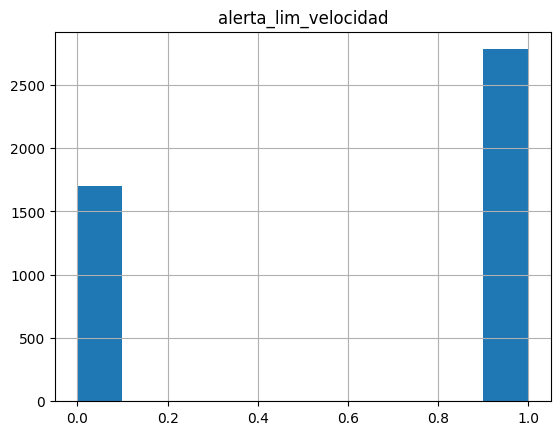

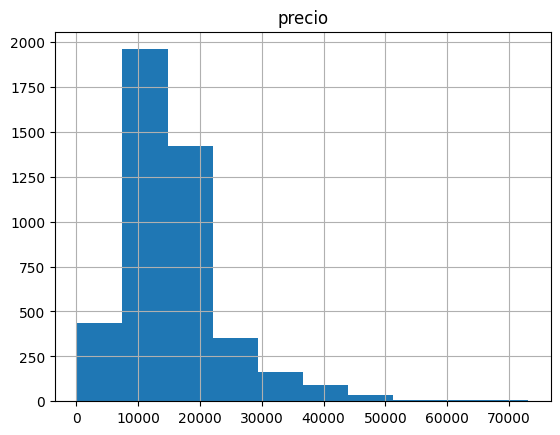

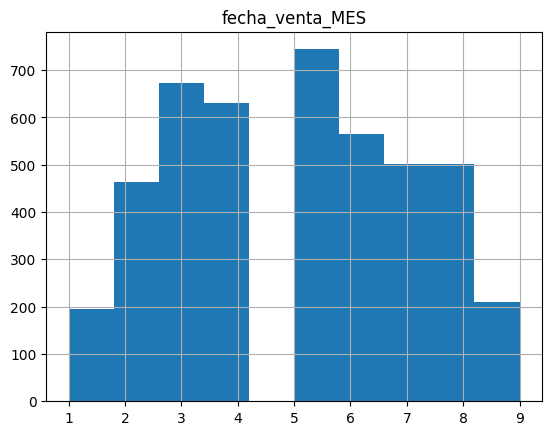

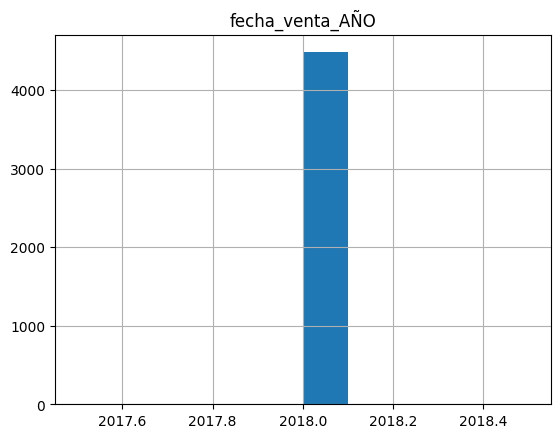

In [80]:
# Bucle para ver en general las columnas. 
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind == "O") or (df_bmw_rec[i].dtype.kind == "B"):
    print(i,'\n', df_bmw_rec[i].value_counts(), '\n')
  elif (df_bmw_rec[i].dtype.kind=="f") or (df_bmw_rec[i].dtype.kind=="i"):
    print(df_bmw_rec.hist(i))

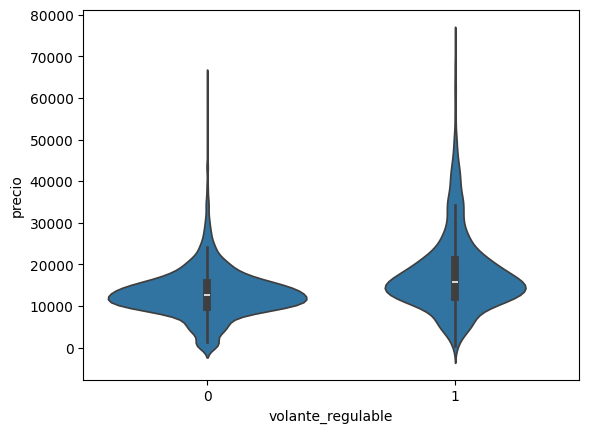

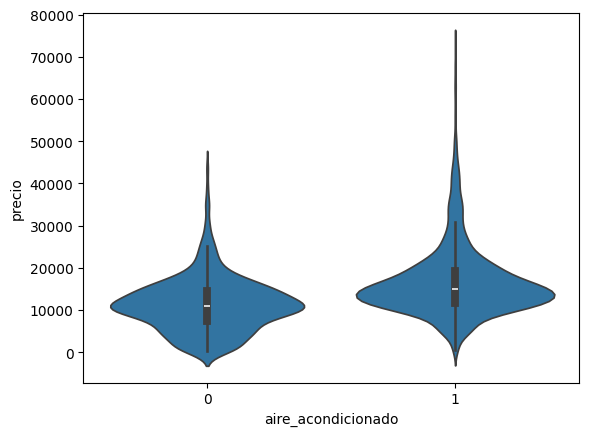

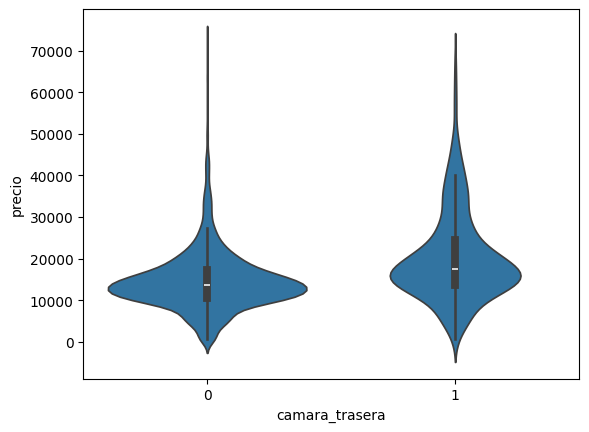

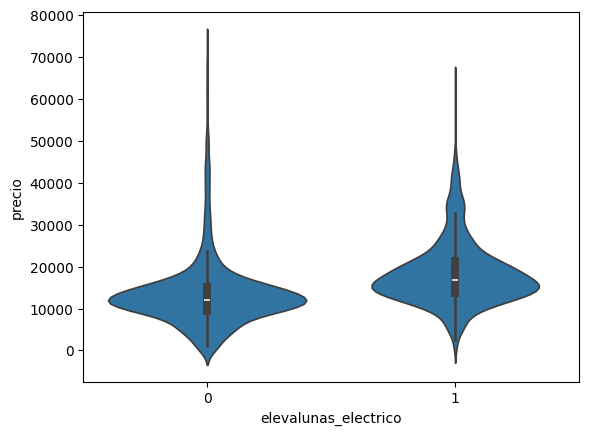

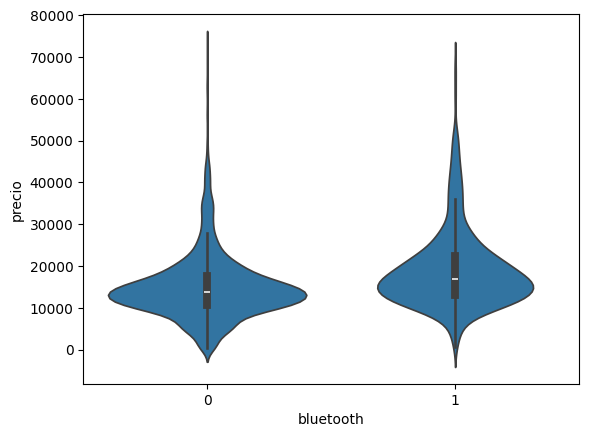

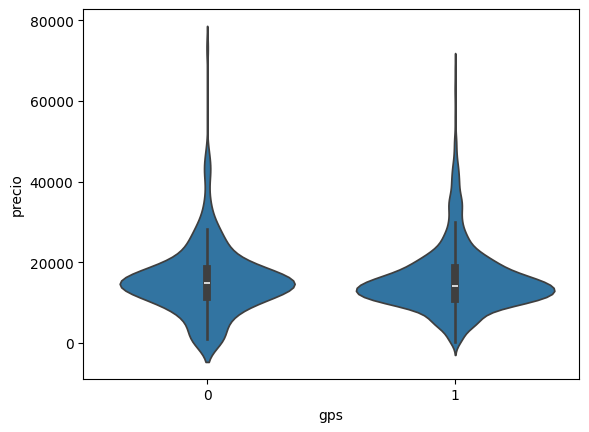

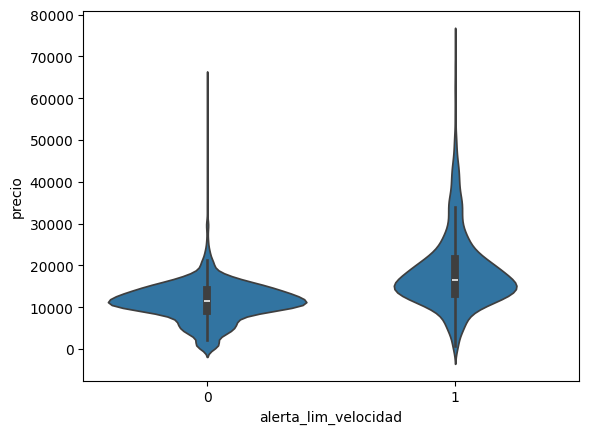

In [81]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind =="i"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw_rec)    

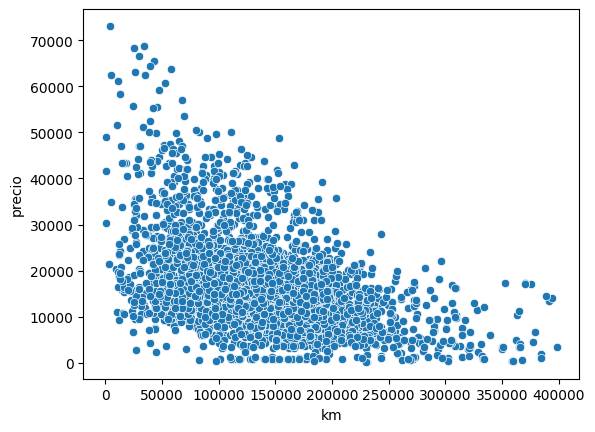

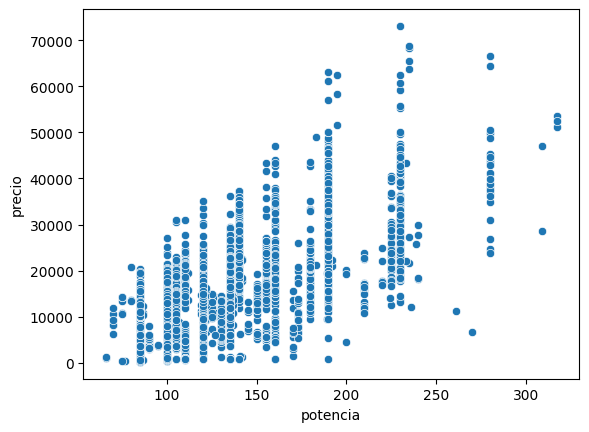

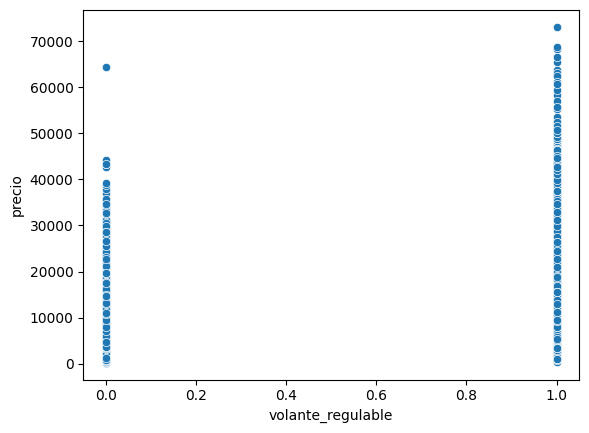

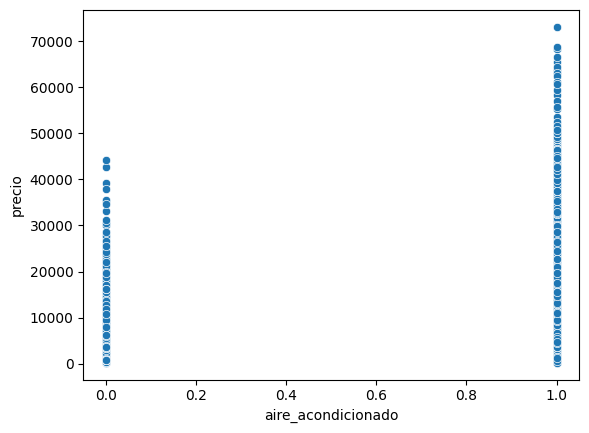

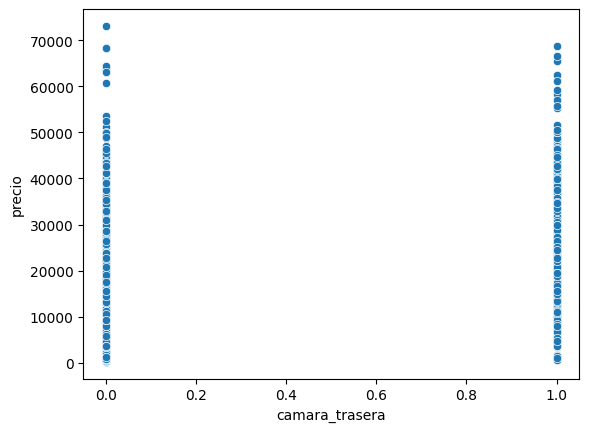

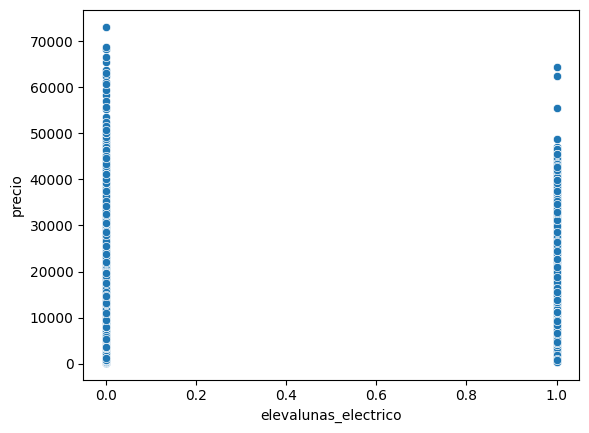

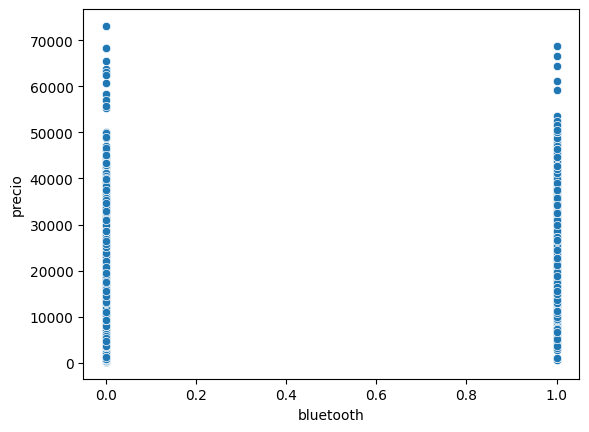

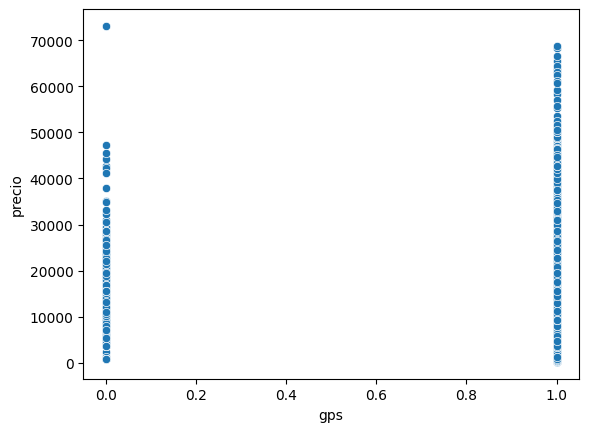

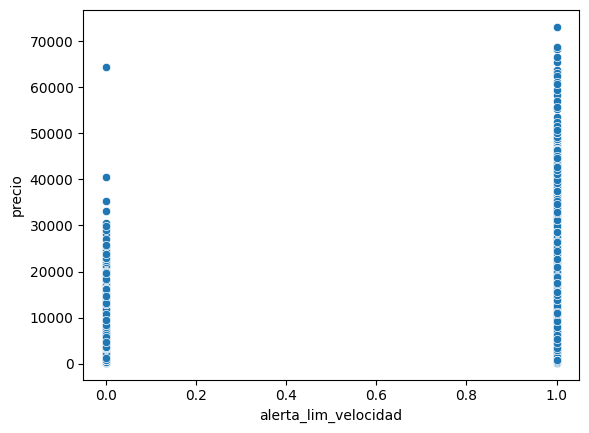

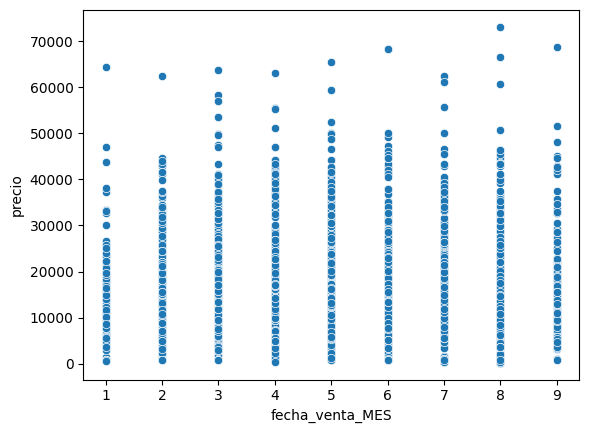

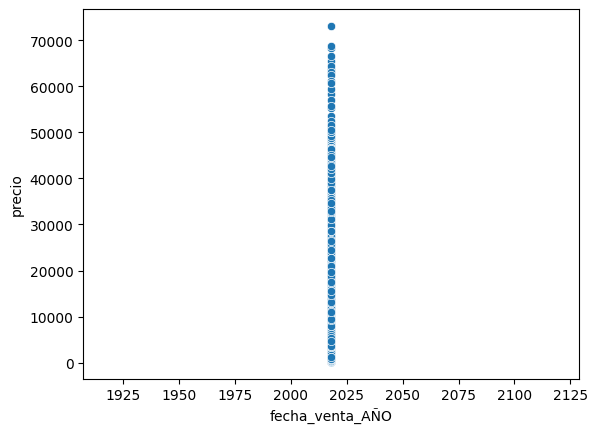

In [82]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_bmw_rec)   

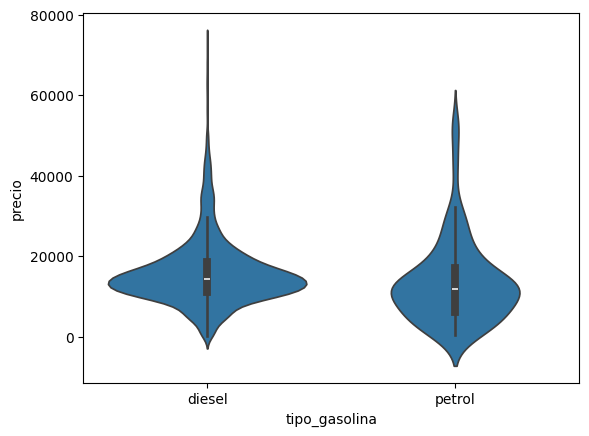

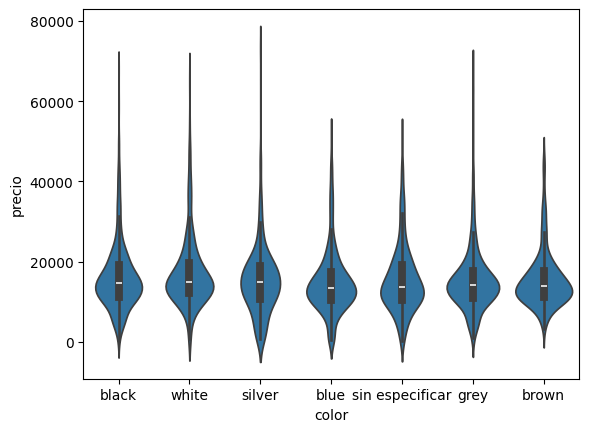

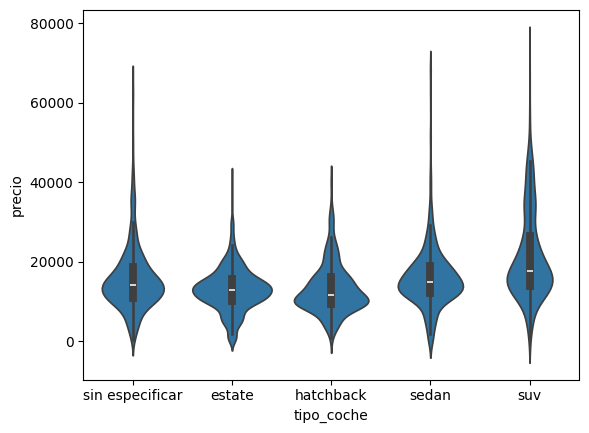

In [83]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw_rec)   

<Axes: xlabel='precio'>

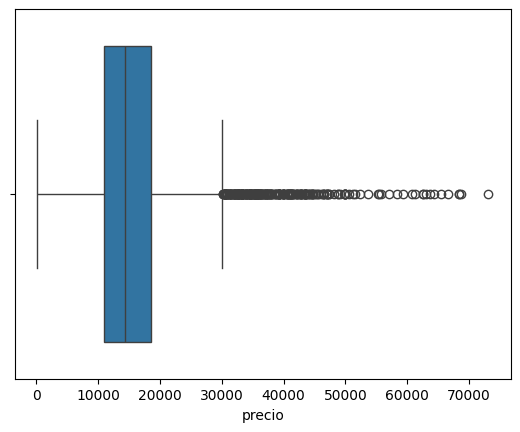

In [84]:
sns.boxplot(x=df_bmw_rec["precio"])

<Axes: xlabel='LOG_PRECIO'>

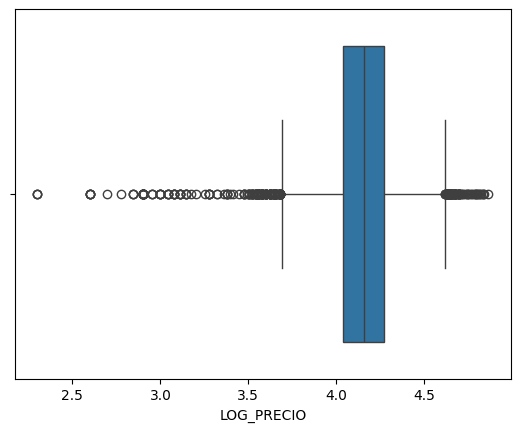

In [85]:
df_bmw_rec["LOG_PRECIO"]=np.log10(df_bmw_rec["precio"])
sns.boxplot(x=df_bmw_rec["LOG_PRECIO"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

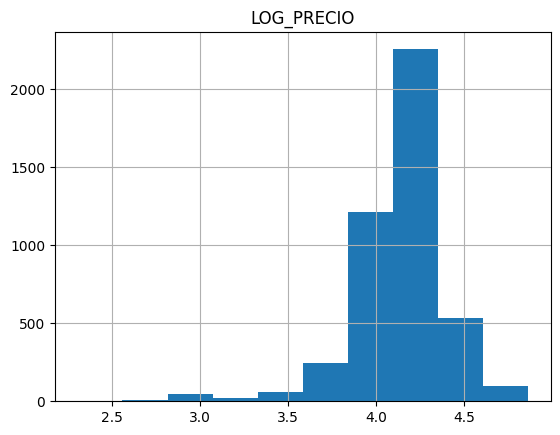

In [86]:
df_bmw_rec.hist("LOG_PRECIO")

In [87]:
df_bmw_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4481 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4481 non-null   float64
 1   potencia              4481 non-null   float64
 2   tipo_gasolina         4481 non-null   object 
 3   color                 4481 non-null   object 
 4   tipo_coche            4481 non-null   object 
 5   volante_regulable     4481 non-null   int64  
 6   aire_acondicionado    4481 non-null   int64  
 7   camara_trasera        4481 non-null   int64  
 8   elevalunas_electrico  4481 non-null   int64  
 9   bluetooth             4481 non-null   int64  
 10  gps                   4481 non-null   int64  
 11  alerta_lim_velocidad  4481 non-null   int64  
 12  precio                4481 non-null   float64
 13  fecha_venta_MES       4481 non-null   float64
 14  fecha_venta_AÑO       4481 non-null   float64
 15  LOG_PRECIO            4481

In [88]:
# Clasificamos las columnas en listas numéricas, booleanas y categóricas.
target= ["PRECIO","LOG_PRECIO"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [89]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw_rec)

In [90]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche']

In [91]:
lista_numericas

['km', 'potencia', 'precio', 'fecha_venta_MES', 'fecha_venta_AÑO']

In [92]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [93]:
df_bmw_prep=pd.get_dummies(data=df_bmw_rec,columns=lista_categoricas).astype('int64')

In [94]:
df_bmw_prep.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_brown,color_grey,color_silver,color_sin especificar,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin especificar,tipo_coche_suv
0,140411,100,1,1,0,1,0,1,1,11300,...,0,0,0,0,0,0,0,0,1,0
2,183297,120,0,0,0,1,0,1,0,10200,...,0,0,0,0,1,0,0,0,1,0
4,97097,160,1,1,0,0,1,1,1,33400,...,0,0,1,0,0,0,0,0,1,0
5,152352,225,1,1,0,1,1,1,1,17100,...,0,0,0,0,0,0,0,0,1,0
11,228000,145,1,1,0,1,0,1,1,13300,...,0,0,0,0,0,0,0,0,1,0


In [95]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw_prep[variable_transformar]=minMaxResultado.fit_transform(df_bmw_prep[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [96]:
for i in lista_numericas:
  print(i)

km
potencia
precio
fecha_venta_MES
fecha_venta_AÑO


In [97]:
for i in lista_numericas:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [98]:
for i in ["fecha_venta_MES"]:
  del(df_bmw_prep[i])

In [99]:
df_bmw_prep.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_brown,color_grey,color_silver,color_sin especificar,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin especificar,tipo_coche_suv
0,0.351978,0.135458,1,1,0,1,0,1,1,0.152263,...,0,0,0,0,0,0,0,0,1,0
2,0.459850,0.215139,0,0,0,1,0,1,0,0.137174,...,0,0,0,0,1,0,0,0,1,0
4,0.243031,0.374502,1,1,0,0,1,1,1,0.455418,...,0,0,1,0,0,0,0,0,1,0
5,0.382014,0.633466,1,1,0,1,1,1,1,0.231824,...,0,0,0,0,0,0,0,0,1,0
11,0.572291,0.314741,1,1,0,1,0,1,1,0.179698,...,0,0,0,0,0,0,0,0,1,0


In [100]:
corr2 = df_bmw_prep.corr()
corr2.style.background_gradient(cmap='coolwarm')

c:\Users\mitev\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\mitev\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_AÑO,LOG_PRECIO,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_grey,color_silver,color_sin especificar,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin especificar,tipo_coche_suv
km,1.000000,-0.042489,0.067908,0.031964,0.001848,0.054863,-0.029470,0.168461,-0.032940,-0.425829,nan,-0.305575,0.028656,-0.028656,0.036631,-0.019020,-0.023700,0.025870,0.019938,0.004118,-0.071245,0.135285,-0.109236,0.058473,-0.019828,-0.101118
potencia,-0.042489,1.000000,0.323249,0.180705,0.314551,0.337675,0.193261,0.011471,0.428430,0.678636,nan,0.269666,-0.095147,0.095147,0.036111,-0.011145,-0.060256,-0.001765,0.023149,-0.007177,-0.002458,-0.048624,-0.189970,0.027492,-0.012090,0.200923
volante_regulable,0.067908,0.323249,1.000000,0.285523,0.255652,0.267706,0.116946,0.248513,0.184905,0.287673,nan,0.165970,0.023763,-0.023763,0.022358,0.015201,0.037645,0.050497,-0.014690,-0.032582,-0.109597,0.001472,-0.125287,0.056349,-0.029819,0.081580
aire_acondicionado,0.031964,0.180705,0.285523,1.000000,0.141484,0.260457,0.104382,0.358099,0.160081,0.238751,nan,0.269899,0.078486,-0.078486,0.038261,-0.001430,0.044311,0.018835,-0.029604,-0.044632,-0.053452,0.069220,-0.084130,0.056765,-0.041757,-0.016363
camara_trasera,0.001848,0.314551,0.255652,0.141484,1.000000,0.199026,0.122091,0.063451,0.170411,0.265853,nan,0.091988,-0.012311,0.012311,0.020157,0.000884,-0.018425,0.017419,0.000484,-0.034886,-0.007706,-0.043442,-0.032920,-0.018172,0.000838,0.095370
elevalunas_electrico,0.054863,0.337675,0.267706,0.260457,0.199026,1.000000,0.230448,0.201465,0.296489,0.277884,nan,0.257841,-0.019088,0.019088,0.078421,-0.037016,-0.024511,-0.026042,-0.026686,-0.015085,0.012912,0.041524,-0.078112,0.008272,-0.009556,0.020453
bluetooth,-0.029470,0.193261,0.116946,0.104382,0.122091,0.230448,1.000000,0.114739,0.075996,0.195463,nan,0.132997,-0.007869,0.007869,0.025553,0.009503,-0.045033,-0.034567,-0.010964,-0.020646,0.063637,-0.013688,0.027988,-0.006635,-0.009537,0.011390
gps,0.168461,0.011471,0.248513,0.358099,0.063451,0.201465,0.114739,1.000000,-0.054862,0.009580,nan,0.039341,0.041368,-0.041368,0.052421,0.008311,0.035660,0.024828,-0.031650,-0.014954,-0.114545,0.058121,-0.003873,0.038609,-0.005521,-0.097023
alerta_lim_velocidad,-0.032940,0.428430,0.184905,0.160081,0.170411,0.296489,0.075996,-0.054862,1.000000,0.404630,nan,0.261380,0.006763,-0.006763,0.037768,-0.018060,-0.034970,-0.017420,0.030051,-0.031025,0.021144,-0.014344,-0.134041,0.030628,-0.014463,0.114513
precio,-0.425829,0.678636,0.287673,0.238751,0.265853,0.277884,0.195463,0.009580,0.404630,1.000000,nan,0.517184,0.050517,-0.050517,0.033063,-0.041995,-0.007732,-0.026224,-0.015896,-0.009669,0.061138,-0.180088,-0.103308,0.016114,-0.008499,0.287975


In [101]:
for i in ["tipo_gasolina_diesel","tipo_gasolina_petrol"]:
  del(df_bmw_prep[i])

In [102]:
corr3 = df_bmw_prep.corr()
corr3.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_AÑO,LOG_PRECIO,color_black,color_blue,color_brown,color_grey,color_silver,color_sin especificar,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin especificar,tipo_coche_suv
km,1.000000,-0.042489,0.067908,0.031964,0.001848,0.054863,-0.029470,0.168461,-0.032940,-0.425829,nan,-0.305575,0.036631,-0.019020,-0.023700,0.025870,0.019938,0.004118,-0.071245,0.135285,-0.109236,0.058473,-0.019828,-0.101118
potencia,-0.042489,1.000000,0.323249,0.180705,0.314551,0.337675,0.193261,0.011471,0.428430,0.678636,nan,0.269666,0.036111,-0.011145,-0.060256,-0.001765,0.023149,-0.007177,-0.002458,-0.048624,-0.189970,0.027492,-0.012090,0.200923
volante_regulable,0.067908,0.323249,1.000000,0.285523,0.255652,0.267706,0.116946,0.248513,0.184905,0.287673,nan,0.165970,0.022358,0.015201,0.037645,0.050497,-0.014690,-0.032582,-0.109597,0.001472,-0.125287,0.056349,-0.029819,0.081580
aire_acondicionado,0.031964,0.180705,0.285523,1.000000,0.141484,0.260457,0.104382,0.358099,0.160081,0.238751,nan,0.269899,0.038261,-0.001430,0.044311,0.018835,-0.029604,-0.044632,-0.053452,0.069220,-0.084130,0.056765,-0.041757,-0.016363
camara_trasera,0.001848,0.314551,0.255652,0.141484,1.000000,0.199026,0.122091,0.063451,0.170411,0.265853,nan,0.091988,0.020157,0.000884,-0.018425,0.017419,0.000484,-0.034886,-0.007706,-0.043442,-0.032920,-0.018172,0.000838,0.095370
elevalunas_electrico,0.054863,0.337675,0.267706,0.260457,0.199026,1.000000,0.230448,0.201465,0.296489,0.277884,nan,0.257841,0.078421,-0.037016,-0.024511,-0.026042,-0.026686,-0.015085,0.012912,0.041524,-0.078112,0.008272,-0.009556,0.020453
bluetooth,-0.029470,0.193261,0.116946,0.104382,0.122091,0.230448,1.000000,0.114739,0.075996,0.195463,nan,0.132997,0.025553,0.009503,-0.045033,-0.034567,-0.010964,-0.020646,0.063637,-0.013688,0.027988,-0.006635,-0.009537,0.011390
gps,0.168461,0.011471,0.248513,0.358099,0.063451,0.201465,0.114739,1.000000,-0.054862,0.009580,nan,0.039341,0.052421,0.008311,0.035660,0.024828,-0.031650,-0.014954,-0.114545,0.058121,-0.003873,0.038609,-0.005521,-0.097023
alerta_lim_velocidad,-0.032940,0.428430,0.184905,0.160081,0.170411,0.296489,0.075996,-0.054862,1.000000,0.404630,nan,0.261380,0.037768,-0.018060,-0.034970,-0.017420,0.030051,-0.031025,0.021144,-0.014344,-0.134041,0.030628,-0.014463,0.114513
precio,-0.425829,0.678636,0.287673,0.238751,0.265853,0.277884,0.195463,0.009580,0.404630,1.000000,nan,0.517184,0.033063,-0.041995,-0.007732,-0.026224,-0.015896,-0.009669,0.061138,-0.180088,-0.103308,0.016114,-0.008499,0.287975


In [103]:
nombre_archivo_csv = 'df_bmw_prep.csv'
df_bmw_prep.to_csv(nombre_archivo_csv, index=False)

In [104]:
pd.to_pickle(df_bmw_prep,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/final_entregable_Simeon_Mitev_PK")

In [105]:
df_bmw_fin=pd.read_pickle("final_entregable_Simeon_Mitev_PK")